In [10]:
import pandas as pd

# Read the text file into a pandas DataFrame
df_CX = pd.read_csv('FINAL 17-4 Reviews CorEx Model\labels.txt', header=None, names=['Doc','Enviromental','Social','Economic','Health'])

# Add "No Theme" and set it to 1 where no other theme is present
themes_list = ['Enviromental','Social','Economic','Health']
no_theme = df_CX[themes_list].eq(0).all(axis=1)
df_CX['No Theme'] = 0
df_CX.loc[no_theme, 'No Theme'] = 1
themes_list.append('No Theme')

# Getting a random number of size 15 from each theme
list_samples_CX = pd.concat([df_CX[df_CX[theme] == 1].sample(n=min(20, (df_CX[theme] == 1).sum()), random_state=999) for theme in themes_list])
list_samples_CX = list_samples_CX["Doc"].to_list()

print(list_samples_CX)


[174337, 188711, 22728, 142205, 184654, 137397, 108764, 88766, 49209, 162115, 149921, 151384, 174991, 185986, 92328, 150785, 146883, 113946, 36813, 192056, 21436, 204602, 32332, 71034, 1847, 208425, 132158, 4208, 70773, 64829, 47546, 8112, 170313, 28384, 168551, 198875, 149540, 87313, 4223, 26704, 110142, 138, 39779, 43926, 17041, 170703, 184784, 141873, 76607, 47187, 161068, 46462, 74098, 133572, 17325, 15135, 22185, 41587, 158046, 75992, 140795, 4271, 201762, 92534, 71341, 120218, 61402, 178086, 107191, 69558, 55817, 146209, 141219, 113813, 49190, 22854, 24217, 169561, 157245, 93755, 169151, 135584, 112481, 144842, 107994, 150726, 136372, 35596, 87976, 134320, 199470, 145812, 209288, 52151, 23126, 62375, 56817, 133596, 21688, 133216]


In [11]:
# GLDA getting lables

# Read the text file into pandas DataFrame
df_GLDA = pd.read_csv('FINAL 17-4 Reviews GLDA Model.txt', sep='\t', header=None, names=['Doc','Enviromental','Social','Economic','Health'])

# Add "No Theme" and set it to 1 where no other theme is present
themes_list = ['Enviromental','Social','Economic','Health']
no_theme = df_GLDA[themes_list].eq(0).all(axis=1)
df_GLDA['No Theme'] = 0
df_GLDA.loc[no_theme, 'No Theme'] = 1
themes_list.append('No Theme')

# Getting a random number of size 15 from each theme
list_samples_GLDA = pd.concat([df_GLDA[df_GLDA[theme] == 1].sample(n=min(20, (df_GLDA[theme] == 1).sum()), random_state=888) for theme in themes_list])
list_samples_GLDA = list_samples_GLDA["Doc"].to_list()
#list_samples_GLDA.sort()
print(list_samples_GLDA)


[159612, 90409, 170308, 45518, 174523, 192910, 117842, 167318, 124186, 166067, 177304, 54553, 68575, 188288, 87758, 97447, 68501, 160014, 120648, 118527, 130393, 94035, 64146, 183908, 199144, 183036, 150138, 79077, 208591, 26867, 133119, 155541, 46220, 206831, 13136, 117571, 131249, 188055, 156699, 96605, 32237, 155108, 38524, 46938, 47115, 17957, 207129, 47271, 39984, 82928, 77336, 74666, 174153, 1951, 31907, 142379, 32943, 20099, 52542, 85883, 110234, 159356, 140549, 80350, 167624, 110363, 12388, 18746, 150612, 170050, 159939, 194384, 134413, 122411, 152585, 43511, 175819, 103694, 119715, 139295, 12244, 13241, 142690, 129598, 75308, 51837, 166262, 48120, 197031, 155523, 182376, 174795, 49965, 81362, 93157, 146162, 133401, 115558, 178572, 86243]


In [12]:
# Getting list of lables for each model (based on those random numbers)

# Combine random sample list of both models
random_samples_list = list_samples_CX + list_samples_GLDA
random_samples_list.sort()
random_samples_list


# Check for duplicates
from collections import Counter
duplicates = [item for item, count in Counter(random_samples_list).items() if count > 1]
print("Duplicates found:", duplicates) if duplicates else print("No duplicates found")

# Take lable samples from each of the models
# Getting Corex labels 
df_samples_CX = df_CX[df_CX['Doc'].isin(random_samples_list)]
df_samples_CX

# Getting GLDA labels 
df_samples_GLDA = df_GLDA[df_GLDA['Doc'].isin(random_samples_list)]
df_samples_GLDA



No duplicates found


,Doc,Enviromental,Social,Economic,Health,No Theme
138,138,0,0,1,0,0
1847,1847,0,0,1,0,0
1951,1951,0,0,1,0,0
4208,4208,0,0,1,0,0
4223,4223,0,0,0,0,1
...,...,...,...,...,...,...
206831,206831,0,1,0,0,0
207129,207129,0,0,1,0,0
208425,208425,0,0,0,0,1
208591,208591,0,1,0,0,0


In [13]:
all_labels_sample = pd.merge(df_samples_CX, df_samples_GLDA, how='outer', on='Doc', suffixes=('_CX', '_GLDA'))
all_labels_sample

,Doc,Enviromental_CX,Social_CX,Economic_CX,Health_CX,No Theme_CX,Enviromental_GLDA,Social_GLDA,Economic_GLDA,Health_GLDA,No Theme_GLDA
0,138,0,0,1,0,0,0,0,1,0,0
1,1847,0,1,1,0,0,0,0,1,0,0
2,1951,1,1,1,1,0,0,0,1,0,0
3,4208,1,1,1,1,0,0,0,1,0,0
4,4223,1,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
195,206831,0,1,0,0,0,0,1,0,0,0
196,207129,0,0,0,0,1,0,0,1,0,0
197,208425,0,1,0,0,0,0,0,0,0,1
198,208591,0,0,0,0,1,0,1,0,0,0


In [14]:
# Get reviews file
df_desc = pd.read_csv('CLEAN REVIEWS for Evaluation 17-4.csv')

# Selecting only the columns that are required for analysis
required_columns = ["clean_reviews","asin", "num_words_reviews","newReviewText"]
df_desc = df_desc[required_columns]
df_desc

,clean_reviews,asin,num_words_reviews,newReviewText
0,husband wanted reading negro baseball great ad...,0143026860,29,My husband wanted to reading about the Negro ...
1,baseball fan knew bit negro league learned lot...,0143026860,23,I am already a baseball fan and knew a bit abo...
2,good story black league bought book teach high...,0143026860,67,This was a good story of the Black leagues. I ...
3,like product smudged eye thoroughly day,014789302X,14,I didn't like this product it smudged all unde...
4,burn eye light going forth lot dark eyeliner c...,014789302X,35,it burns your eyes when u put it on and very ...
...,...,...,...,...
210647,love love love time saver people like hair gre...,B01HJEGTYK,38,love! love! love! these what a Time Saver for ...
210648,awful super frizzy tried comb fell completely ...,B01HJEGTYK,28,It was awful. It was super frizzy and I tried ...
210649,sceptical buying worried look obviously fake s...,B01HJEGTYK,43,I was skeptical about buying this. Worried it...
210650,way lighter photon mix blend quality shown vol...,B01HJEGTYK,25,Way lighter than photoNot mix blend of colorsN...


In [15]:
# Merge labels from both models and the descriptions
final_samples = pd.merge(all_labels_sample, df_desc, right_index=True, left_on='Doc')

# Sort by order of sampling 
final_samples = final_samples.sort_values(by = 'Doc', key = lambda col: col.map(lambda x: random_samples_list.index(x)))
final_samples


,Doc,Enviromental_CX,Social_CX,Economic_CX,Health_CX,No Theme_CX,Enviromental_GLDA,Social_GLDA,Economic_GLDA,Health_GLDA,No Theme_GLDA,clean_reviews,asin,num_words_reviews,newReviewText
0,138,0,0,1,0,0,0,0,1,0,0,stand parker brush mercury long handle razor f...,1620213982,15,The stand is well made. My Parker brush and Me...
1,1847,0,1,1,0,0,0,0,1,0,0,attractive stable reasonably priced hold brush...,1620213982,36,It's attractive. It's stable. It's reasonabl...
2,1951,1,1,1,1,0,0,0,1,0,0,start appearance product amazingly sleek good ...,1620213982,98,"To start off, the appearance of this product i..."
3,4208,1,1,1,1,0,0,0,1,0,0,great alternative shaving use time recommend l...,B00005JS5C,130,This is a great alternative to shaving and I u...
4,4223,1,1,1,0,0,0,0,0,0,1,disappointed product reason quality like child...,B00005JS5C,94,I am very disappointed in this product for man...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,206831,0,1,0,0,0,0,1,0,0,0,took chance wig procrastinator needed zelda co...,B01EQ0NF10,66,Took a chance with this wig because I am a las...
196,207129,0,0,0,0,1,0,0,1,0,0,great product looking work properly no problem...,B01EY0HGPI,26,Great Product! Just what i was looking for! Wo...
197,208425,0,1,0,0,0,0,0,0,0,1,cool product work great feel nervous throwing ...,B01FWQNGAM,24,"Cool product, works great, but feel nervous th..."
198,208591,0,0,0,0,1,0,1,0,0,0,good review bribed received product free discount,B01G0VCYWY,15,All good reviews have been bribed!!! They all ...


In [16]:
# Export to xlsx file for labeling
final_samples.to_excel("FOR LABELING.xlsx", index=False , sheet_name="Samples")



In [25]:
# Import xlsx file with labels from all experts
labeled_samples = pd.read_excel("LABELED REVIEWS AND MODELS 19-4 FINAL.xlsx", sheet_name="Samples")
labeled_samples

,Doc,Enviromental_CX,Social_CX,Economic_CX,Health_CX,No Theme_CX,Enviromental_GLDA,Social_GLDA,Economic_GLDA,Health_GLDA,...,newReviewText_x,clean_reviews_y,asin_y,num_words_reviews_y,newReviewText_y,Enviromental_Expert,Social_Expert,Economic_Expert,Health_Expert,No Theme_Expert
0,72797,1,0,0,0,0,0,0,0,0,...,Our dental hygienist is impressed with the res...,dental hygienist impressed result easy use com...,B000FOI48G,20,Our dental hygienist is impressed with the res...,0,0,0,0,1
1,53309,1,0,0,1,0,0,0,0,0,...,My daughter likes to use organic shampoo and d...,daughter like use organic shampoo no poo hair ...,B00567UTKI,35,My daughter likes to use organic shampoo and d...,0,0,0,0,1
2,53334,1,1,0,1,0,0,1,0,0,...,This makes my hair soft and shiny. Rinses out...,make hair soft shiny rinse hair easily shampoo...,B00567UTKI,130,This makes my hair soft and shiny. Rinses out...,0,0,0,0,1
3,81753,1,0,0,1,0,0,0,0,1,...,Love this product. I am 49 and color my hair....,love product color hair hair feel like younger...,B00D3M0CRS,56,Love this product. I am 49 and color my hair....,0,0,0,0,1
4,81785,1,0,0,1,0,0,0,0,1,...,Poppy Austin and saadia organics are the only ...,poppy austin saadi organic brand organ oil tru...,B00D3M0CRS,79,Poppy Austin and saadia organics are the only ...,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,4832,0,1,1,0,0,0,0,1,0,...,Great for decreasing thickness and maintaining...,great decreasing thickness maintaining hair ge...,B00005JS5C,54,Great for decreasing thickness and maintaining...,0,0,0,0,1
396,152972,0,1,0,1,0,0,0,0,1,...,"This product has titanium dioxide in it, so wh...",product titanium dioxide brightens eye creamy ...,B0013KZCHW,88,"This product has titanium dioxide in it, so wh...",0,0,0,0,1
397,208576,1,1,1,1,0,0,0,0,0,...,"Frog Lube has been, hands down, the best produ...",frog lube hand best product cleaning firearm b...,B01G0O3YQQ,98,"Frog Lube has been, hands down, the best produ...",0,0,0,0,1
398,16266,0,1,1,0,0,0,0,1,0,...,I replaced my T770 model after the battery die...,replaced model battery died good fair job trim...,B000FED5D0,112,I replaced my T770 model after the battery die...,0,0,0,0,1


In [36]:
# Evaluation TODO add hammming loss

from sklearn import metrics
from sklearn.metrics import classification_report


y_true_all_cx = labeled_samples[['Enviromental_Expert','Social_Expert','Economic_Expert','Health_Expert','No Theme_Expert']]
y_pred_all_cx = labeled_samples[['Enviromental_CX','Social_CX','Economic_CX','Health_CX','No Theme_CX']]
print(classification_report(y_true_all_cx,y_pred_all_cx, target_names=['Enviromental','Social','Economic','Health','No Theme']))
print("------------------------------------")

expert_labels = ['Enviromental_Expert','Social_Expert','Economic_Expert','Health_Expert','No Theme_Expert']

cx_labels = ['Enviromental_CX','Social_CX','Economic_CX','Health_CX','No Theme_CX']
glda_labels = ['Enviromental_GLDA','Social_GLDA','Economic_GLDA','Health_GLDA','No Theme_GLDA']

# Corex accuracy calculation
for expert, cx in zip(expert_labels, cx_labels):
    # expert #cx
    y_true = labeled_samples[expert]
    y_pred = labeled_samples[cx]
    accuracy = metrics.accuracy_score(y_true,y_pred)
    print("COREX Accuracy,",expert.replace("_Expert",""), accuracy)

print("-------------------------------------------------")

y_true_all_glda = labeled_samples[['Enviromental_Expert','Social_Expert','Economic_Expert','Health_Expert','No Theme_Expert']]
y_pred_all_glda = labeled_samples[['Enviromental_GLDA','Social_GLDA','Economic_GLDA','Health_GLDA','No Theme_GLDA']]
print(classification_report(y_true_all_glda,y_pred_all_glda, target_names=['Enviromental','Social','Economic','Health','No Theme']))
print("------------------------------------")

# GLDA accuracy calculation
for expert, glda in zip(expert_labels, glda_labels):
    # expert #glda
    y_true = labeled_samples[expert]
    y_pred = labeled_samples[glda]
    accuracy = metrics.accuracy_score(y_true,y_pred)
    print("GLDA Accuracy ",expert.replace("_Expert",""), accuracy)

              precision    recall  f1-score   support

Enviromental       0.15      0.88      0.25        32
      Social       0.15      0.89      0.26        27
    Economic       0.03      0.50      0.06        10
      Health       0.19      0.97      0.32        36
    No Theme       1.00      0.14      0.24       334

   micro avg       0.19      0.31      0.24       439
   macro avg       0.30      0.67      0.23       439
weighted avg       0.80      0.31      0.25       439
 samples avg       0.21      0.27      0.23       439

------------------------------------
COREX Accuracy, Enviromental 0.585
COREX Accuracy, Social 0.6575
COREX Accuracy, Economic 0.6225
COREX Accuracy, Health 0.625
COREX Accuracy, No Theme 0.28
-------------------------------------------------
              precision    recall  f1-score   support

Enviromental       0.04      0.06      0.05        32
      Social       0.02      0.04      0.03        27
    Economic       0.01      0.10      0.02        

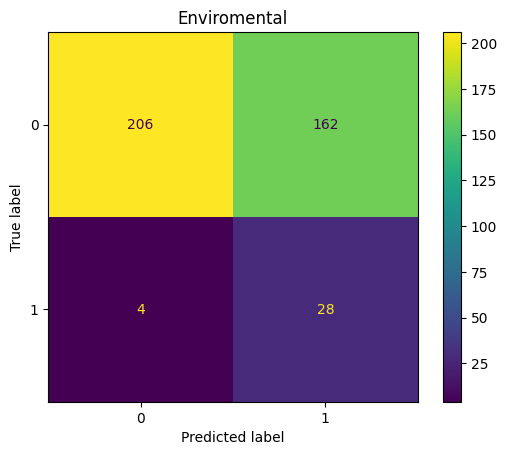

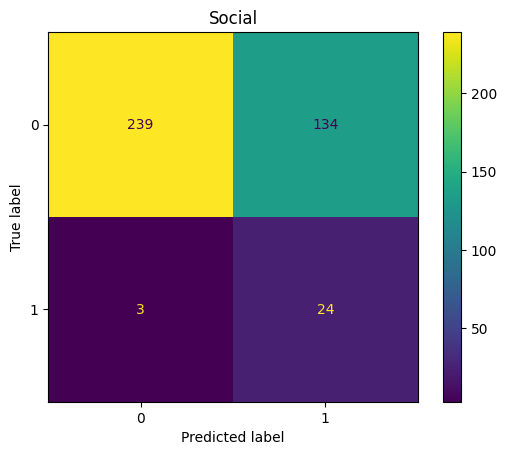

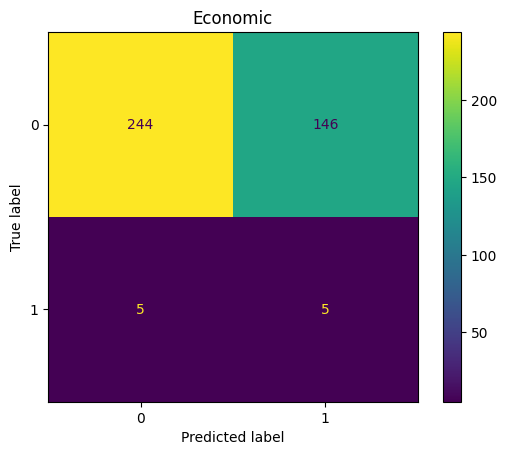

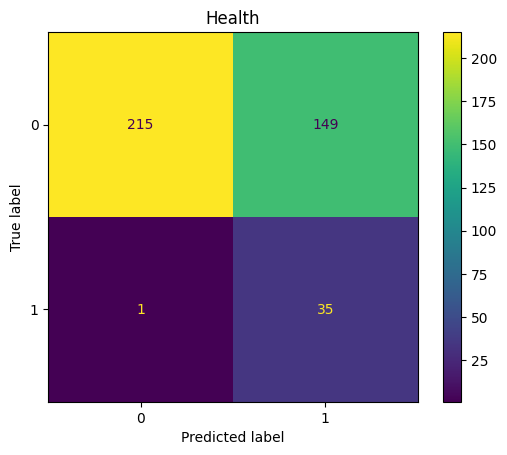

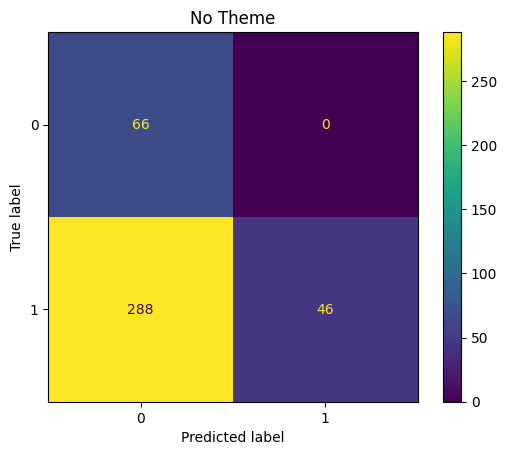

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

expert_labels = ['Enviromental_Expert','Social_Expert','Economic_Expert','Health_Expert','No Theme_Expert']

cx_labels = ['Enviromental_CX','Social_CX','Economic_CX','Health_CX','No Theme_CX']
glda_labels = ['Enviromental_GLDA','Social_GLDA','Economic_GLDA','Health_GLDA','No Theme_GLDA']

# Corex accuracy calculation
for expert, cx in zip(expert_labels, cx_labels):
    y_true = labeled_samples[expert]
    y_pred = labeled_samples[cx]
    cm = confusion_matrix(y_true, y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix=cm)
    display.plot()
    plt.title(expert.replace("_Expert",""))



-------------------------------------------------


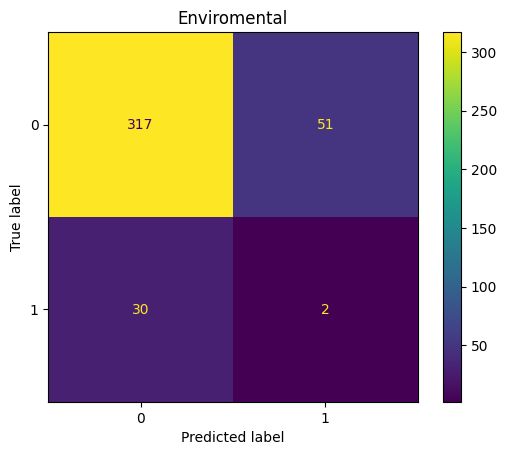

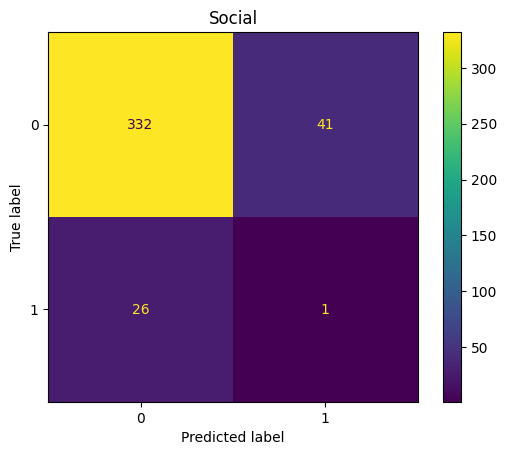

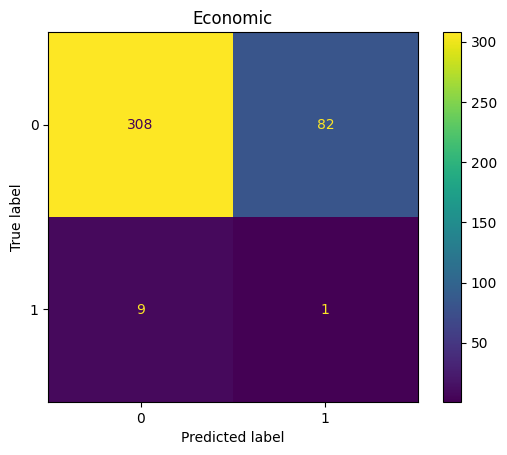

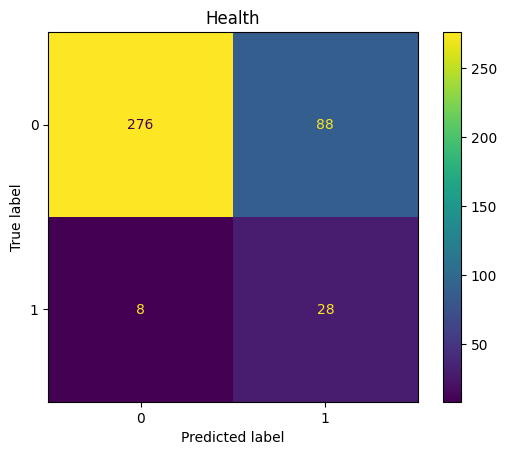

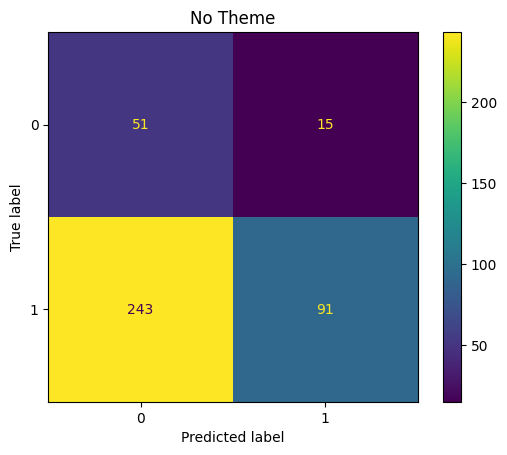

In [33]:
#GLDA
expert_labels = ['Enviromental_Expert','Social_Expert','Economic_Expert','Health_Expert','No Theme_Expert']

glda_labels = ['Enviromental_GLDA','Social_GLDA','Economic_GLDA','Health_GLDA','No Theme_GLDA']
   
# GLDA accuracy calculation
for expert, glda in zip(expert_labels, glda_labels):
    y_true = labeled_samples[expert]
    y_pred = labeled_samples[glda]
    cm = confusion_matrix(y_true, y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix=cm)
    display.plot()
    plt.title(expert.replace("_Expert",""))

